In [1]:
import numpy as np
import pyqsp
from pyqsp import angle_sequence, response
from pyqsp.poly import polynomial_generators, PolyTaylorSeries
from typing import Dict
import numpy as np

def h(f, min, max):
    """
    Eq. (3) in https://arxiv.org/pdf/2210.14892
    """
    return lambda y: f((max - min) * np.arcsin(y) + min)

def h_hat(h, h_max):
    """
    Eq. (4) in https://arxiv.org/pdf/2210.14892
    """
    return lambda y: h(y) / h_max

In [2]:
EXP_RATE = 1  # decay rate of the Gaussian
F = lambda x: np.exp(-EXP_RATE * (x**2))  # Gaussian
# F = lambda x: np.tanh(x)
MIN = -2  # min x
MAX = 2  # max x

H = h(f=F, min=MIN, max=MAX)
POLY_FUNC = h_hat(h=H, h_max=F(0))
# POLY_FUNC = F
POLY_DEGREE = 25
POLY_MAX_SCALE = 1

POLY_EVEN = lambda x: (POLY_FUNC(x) + POLY_FUNC(-x))
POLY_ODD = lambda x: (POLY_FUNC(x) - POLY_FUNC(-x))
print("h_max", F(0))

h_max 1.0


### Finding phase angles for the even polynomial

Get Chebychev coefficients for the even parts of the polynomial

In [3]:
poly_even = PolyTaylorSeries().taylor_series(
    func=POLY_EVEN,
    degree=POLY_DEGREE+3,
    max_scale=POLY_MAX_SCALE,
    chebyshev_basis=True,
    cheb_samples=(POLY_DEGREE+3),
)

[PolyTaylorSeries] (Cheb) max 1.0000002010996418 is at 0.4794252726777788: normalizing
[PolyTaylorSeries] (Cheb) average error = 2.3092589728810148e-07 in the domain [-1, 1] using degree 28


Compute phase angles

In [4]:
(phiset_even) = angle_sequence.QuantumSignalProcessingPhases(
    poly_even, signal_operator="Wx", method="laurent", measurement="x"
)
print(phiset_even)
print("len(phiset_even):", len(phiset_even))

[-1.5707638052650055, -1.739611231621474e-05, 3.4974273702914616e-05, 6.197302579558084e-06, -0.0006122100531238406, 0.002279801990279662, -0.0014437937270848078, -0.013232527724066134, 0.04175526063108981, -0.03069907950468953, -0.0936972817420687, 0.24876290976133109, -0.16438840448488068, -0.21625903240061883, 0.4550058564651218, -0.2162590324006255, -0.16438840448487335, 0.24876290976133064, -0.09369728174207226, -0.03069907950468531, 0.041755260631089586, -0.01323252772406791, -0.0014437937270830314, 0.002279801990280106, -0.0006122100531245067, 6.197302579558084e-06, 3.4974273703358705e-05, -1.7396112316880874e-05, 3.25215298914161e-05]
len(phiset_even): 29


Plot

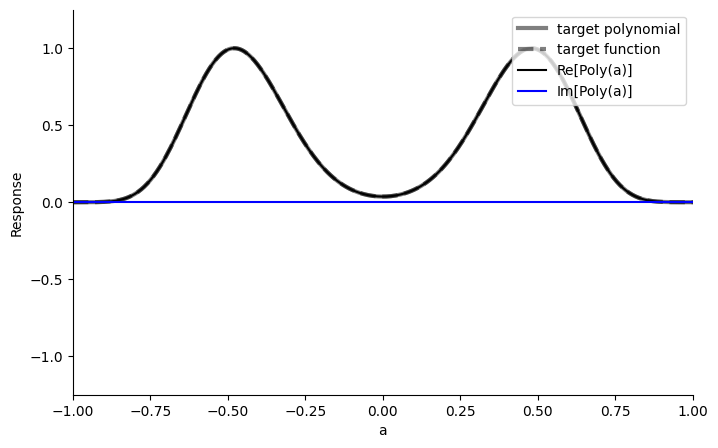

In [5]:
response.PlotQSPResponse(
    np.append(phiset_even, []), pcoefs=poly_even, target=lambda x: POLY_MAX_SCALE * POLY_EVEN(x)
)

### Finding phase angles for the even polynomial

Get Chebychev coefficients for the odd parts of the polynomial

In [6]:
poly_odd = PolyTaylorSeries().taylor_series(
    func=POLY_ODD,
    degree=POLY_DEGREE+2,
    max_scale=POLY_MAX_SCALE,
    chebyshev_basis=True,
    cheb_samples=(POLY_DEGREE+2),
)

[PolyTaylorSeries] (Cheb) max 1.0000011023789412 is at -0.47942595331571: normalizing
[PolyTaylorSeries] (Cheb) average error = 6.799047156021946e-07 in the domain [-1, 1] using degree 27


Compute phase angles

In [7]:
(phiset_odd) = angle_sequence.QuantumSignalProcessingPhases(
    poly_odd, signal_operator="Wx", method="laurent", measurement="x"
)
print(phiset_odd)
print("len(phiset_odd):", len(phiset_odd))

[-1.5707673839990588, -9.221004308113123e-06, 7.761735495526167e-05, -0.00033345653361527283, 0.00016066073603493436, 0.003241736774113324, -0.01119767874891986, 0.007958341102741295, 0.04045713298617226, -0.11729095324548688, 0.08448725166742377, 0.16323661955244684, -0.39046421472405246, 0.21967173426394737, 0.21967173426395048, -0.3904642147240529, 0.16323661955244484, 0.08448725166742621, -0.11729095324548733, 0.04045713298617115, 0.007958341102742406, -0.011197678748920525, 0.003241736774113102, 0.00016066073603582254, -0.000333456533616161, 7.761735495570576e-05, -9.221004308113123e-06, 2.894279583742776e-05]
len(phiset_odd): 28


Plot

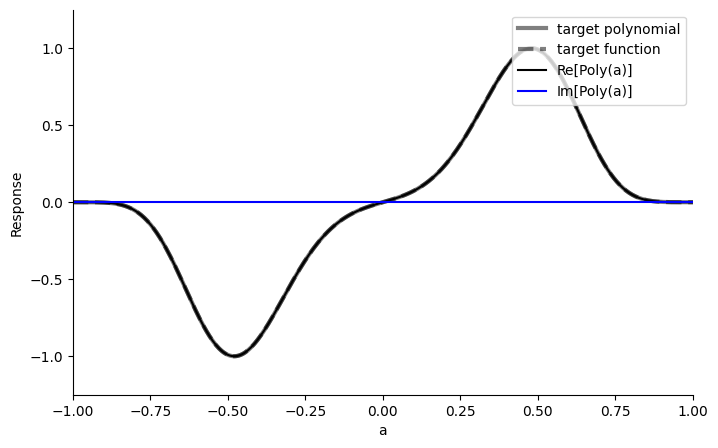

In [8]:
response.PlotQSPResponse(
    np.append(phiset_odd, []), pcoefs=poly_odd, target=lambda x: POLY_MAX_SCALE * POLY_ODD(x)
)